In [8]:
import pandas as pd
import matplotlib.pyplot as plt


# Read the CSV file
data = pd.read_csv('../dataset/AAPL.csv')


# date_header = "timestamp"
# for col in data.columns:
#     if (col != date_header):
#         data[col] = data[col].pct_change()

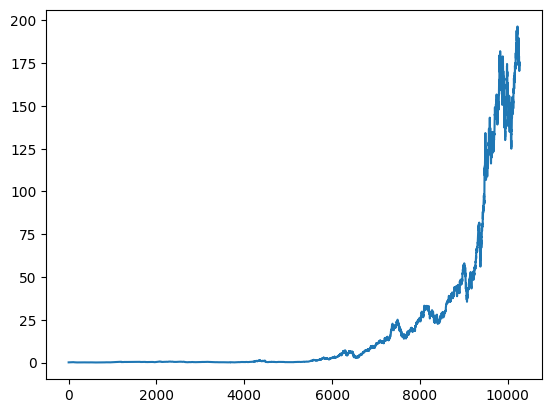

In [9]:

plt.plot(data['Close'])
plt.show()

/var/folders/7_/wfx9d3m96tx8mrcmjqcyx8gm0000gn/T/ipykernel_57672/794431342.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, model_data], ignore_index=True)


Text(0.5, 1.0, 'Relative Squared Error')

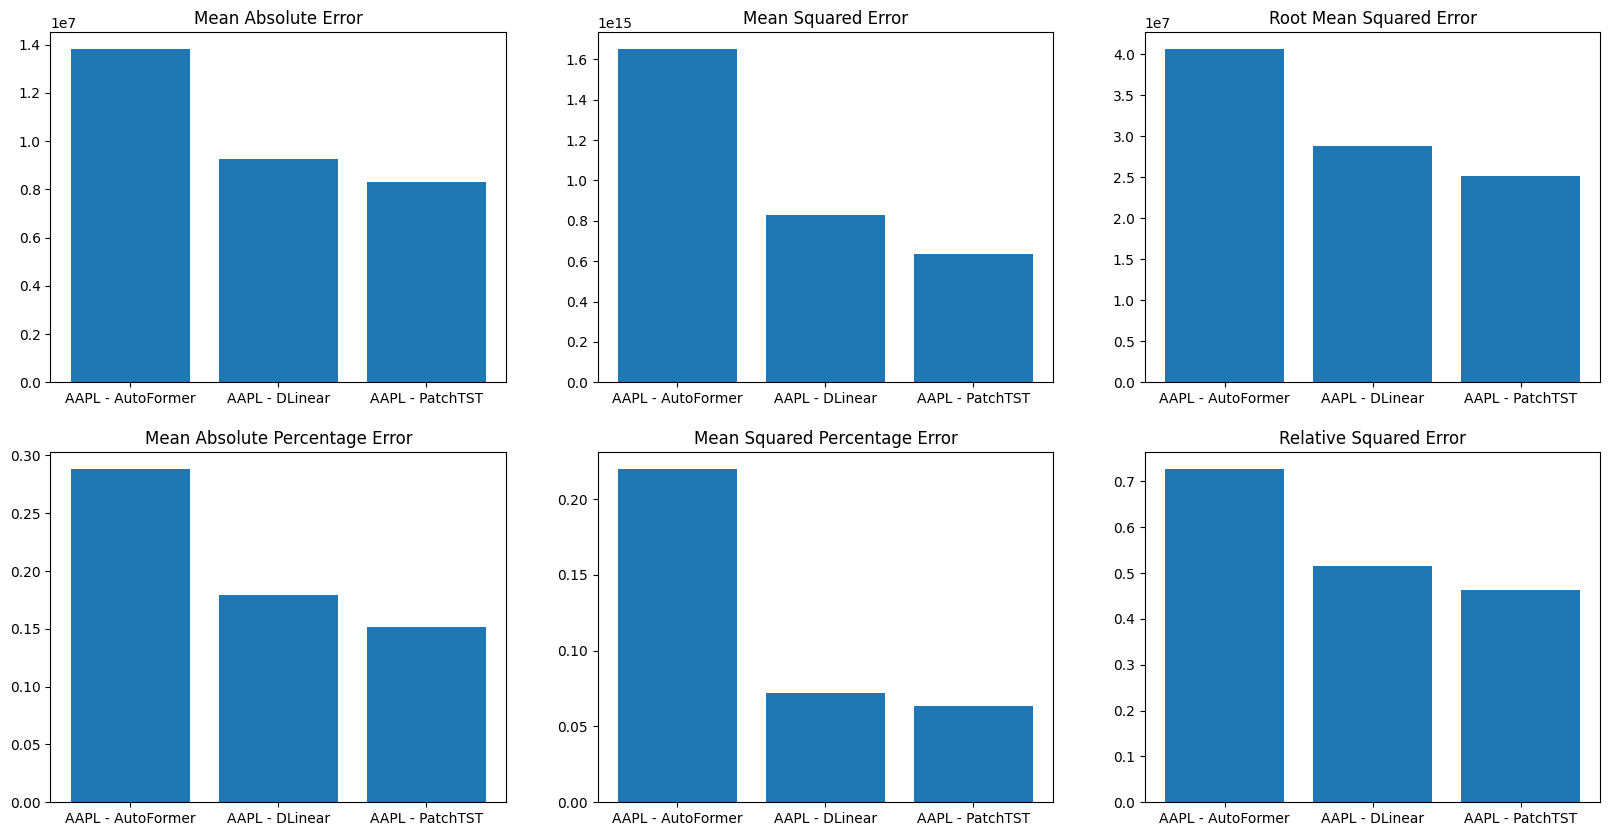

In [55]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

model_ids = {
    "AAPL - AutoFormer": "AAPL_336_96_Autoformer_custom_ftM_sl336_ll48_pl96_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0",
    "AAPL - DLinear": "AAPL_336_96_DLinear_custom_ftM_sl336_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0",
    "AAPL - PatchTST": "AAPL_336_96_PatchTST_custom_ftM_sl336_ll48_pl96_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0",
}


def getPath(model_id):
    return "../results/" + model_id + "/data/"


df = pd.DataFrame(columns=['model_id', 'mae', 'mse',
                  'rmse', 'mape', 'mspe', 'rse'])

for i, (model_name, model_id) in enumerate(model_ids.items()):
    data_path = getPath(model_id)
    metrics = np.load(data_path + "metrics.npy")

    model_data = pd.DataFrame({
        'model_name': model_name,
        'model_id': model_id,
        'mae': metrics[0],
        'mse': metrics[1],
        'rmse': metrics[2],
        'mape': metrics[3],
        'mspe': metrics[4],
        'rse': metrics[5]
    }, index=[i])

    df = pd.concat([df, model_data], ignore_index=True)


width = 0.2
r = np.arange(2)

plt.figure(figsize=(20, 10))
axes1 = plt.subplot(2, 3, 1)
axes2 = plt.subplot(2, 3, 2)
axes3 = plt.subplot(2, 3, 3)
axes4 = plt.subplot(2, 3, 4)
axes5 = plt.subplot(2, 3, 5)
axes6 = plt.subplot(2, 3, 6)

axes1.bar(df['model_name'], df['mae'])
axes1.set_title('Mean Absolute Error(MAE)')

axes2.bar(df['model_name'], df['mse'])
axes2.set_title('Mean Squared Error(MSE)')

axes3.bar(df['model_name'], df['rmse'])
axes3.set_title('Root Mean Squared Error(RMSE)')

axes4.bar(df['model_name'], df['mape'])
axes4.set_title('Mean Absolute Percentage Error(MAPE)')

axes5.bar(df['model_name'], df['mspe'])
axes5.set_title('Mean Squared Percentage Error(MSPE)')

axes6.bar(df['model_name'], df['rse'])
axes6.set_title('Relative Squared Error(RSE)')


# plt.show()